In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
base_dir = '/content/drive/MyDrive/mp1/FastFood'
!ls "/content/drive/MyDrive/mp1/FastFood"

Bahan  Latih  Validasi


In [3]:
import os

Bahan_dir = os.path.join(base_dir,'Bahan')
Train_dir = os.path.join(base_dir, 'Latih')
Validation_dir = os.path.join(base_dir, 'Validasi')

In [4]:
Bahan_dir = '/content/drive/MyDrive/mp1/FastFood/Bahan'
print("Isi folder bahan:")
print(os.listdir(Bahan_dir))

Isi folder bahan:
['Sandwich', 'Donut', 'CrispyChicken']


In [5]:
CrispyChicken_dir = os.path.join(Bahan_dir,'CrispyChicken/')
Donut_dir = os.path.join(Bahan_dir,'Donut/')
Sandwich_dir = os.path.join(Bahan_dir,'Sandwich/')

print("jumlah data train tiap kelas")
print("jumlah gambar Sandwich :",len(os.listdir(Sandwich_dir)))
print("jumlah gambar Donut:",len(os.listdir(Donut_dir)))
print("jumlah gambar CrispyChicken:",len(os.listdir(CrispyChicken_dir)))

jumlah data train tiap kelas
jumlah gambar Sandwich : 201
jumlah gambar Donut: 200
jumlah gambar CrispyChicken: 100


In [6]:
train_Crispy_dir = os.path.join(Train_dir, 'CrispyChicken/')
train_Donut_dir = os.path.join(Train_dir, 'Donut/')
train_Sandwich_dir = os.path.join(Train_dir, 'Sandwich/')

valdation_Crispy_dir = os.path.join(Validation_dir, 'CrispyChicken/')
validation_Donut_dir = os.path.join(Validation_dir, 'Donut/')
validation_Sandwich_dir = os.path.join(Validation_dir, 'Sandwich/')

In [ ]:

import os
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):

    os.makedirs(train, exist_ok=True)
    os.makedirs(val, exist_ok=True)

    total_size = len(os.listdir(source))
    train_size = int(train_ratio * total_size)
    val_size = total_size - train_size

    randomized_list = random.sample(os.listdir(source), total_size)
    train_files = randomized_list[0:train_size]
    val_files = randomized_list[train_size:]

    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        copyfile(i_file, destination)

    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)
        copyfile(i_file, destination)

train_rasio = 0.7


source_00 = CrispyChicken_dir
train_00 = train_Crispy_dir
val_00 = valdation_Crispy_dir
train_val_split(source_00, train_00, val_00, train_rasio)


source_01 = Donut_dir
train_01 = train_Donut_dir
val_01 = validation_Donut_dir
train_val_split(source_01, train_01, val_01, train_rasio)


source_02 = Sandwich_dir
train_02 = train_Sandwich_dir
val_02 = validation_Sandwich_dir
train_val_split(source_02, train_02, val_02, train_rasio)

In [7]:
print('Jumlah All Sandwich :' , len(os.listdir(Sandwich_dir)))
print('Jumlah Train Sandwich:', len(os.listdir(train_Sandwich_dir)))
print('Jumlah Val Sandwich:' , len(os.listdir(validation_Sandwich_dir)))

Jumlah All Sandwich : 201
Jumlah Train Sandwich: 201
Jumlah Val Sandwich: 103


In [ ]:
!find /content/drive/MyDrive/mp1/FastFood/Latih/ -type d -name '.ipynb_checkpoints' -exec rm -r {} +
!find /content/drive/MyDrive/mp1/FastFood/Validasi/ -type d -name '.ipynb_checkpoints' -exec rm -r {} +

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
     rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1

)

In [ ]:

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/mp1/FastFood/Latih/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/mp1/FastFood/Validasi/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print("Jumlah kelas:", len(train_generator.class_indices))

Found 501 images belonging to 3 classes.
Found 139 images belonging to 3 classes.
{'CrispyChicken': 0, 'Donut': 1, 'Sandwich': 2}
Jumlah kelas: 3


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')> 0.99):
      print('/nAkurasi mencapai 99%')
      self.model.stop_training=True

Callbacks = myCallback()

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),

    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),

    tf.keras.layers.Dense(3, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │     3,699,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       100,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,824,987 (14.59 MB)

 Trainable params: 3,824,987 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs=25,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
    callbacks=[Callbacks]
)

Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7650 - loss: 0.6751 - val_accuracy: 0.7812 - val_loss: 0.6562
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7182 - loss: 0.6448 - val_accuracy: 0.7188 - val_loss: 0.6032
Epoch 3/25
4/6 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step - accuracy: 0.7617 - loss: 0.6250

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 904ms/step - accuracy: 0.7630 - loss: 0.6279 - val_accuracy: 0.6562 - val_loss: 0.6700
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7879 - loss: 0.5527 - val_accuracy: 0.7500 - val_loss: 0.6037
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6759 - loss: 0.7335 - val_accuracy: 0.6562 - val_loss: 0.7236
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 648ms/step - accuracy: 0.6224 - loss: 0.8224 - val_accuracy: 0.8438 - val_loss: 0.4789
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7158 - loss: 0.6816 - val_accuracy: 0.7188 - val_loss: 0.6216
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 916ms/step - accuracy: 0.6926 - loss: 0.6517 - val_accuracy: 0.7188 - val_loss: 0.6273
Epoch 9/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 432ms/step - accuracy: 0.7182 - loss: 0.6476 - val_accuracy: 0.6875 - val_loss: 0.7290
Epoch 10/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6955 - loss: 0.6478 - val_accuracy: 0.6250 - val_loss: 0.7277
Epoch 11/25

In [ ]:
print(train_generator.class_indices)

{'CrispyChicken': 0, 'Donut': 1, 'Sandwich': 2}


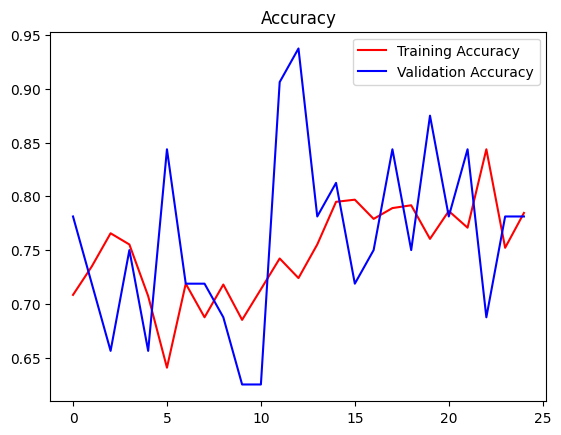

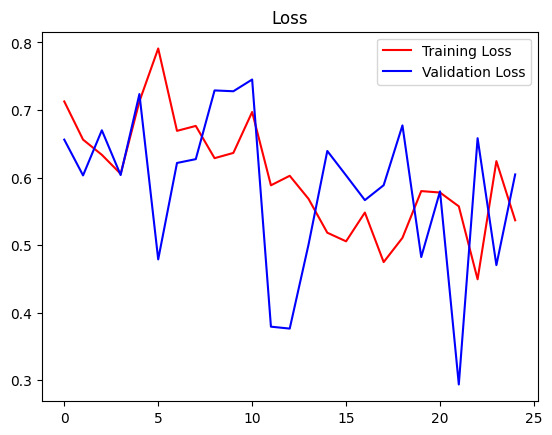

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

Saving Sandwich-Test (87).jpeg to Sandwich-Test (87).jpeg


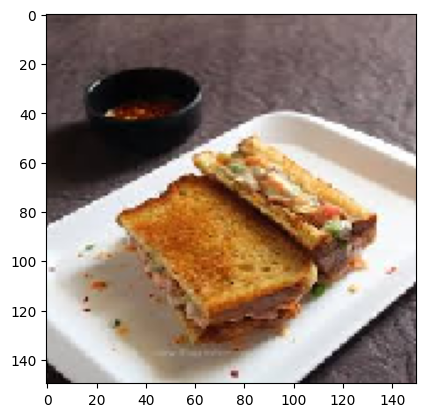

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Sandwich-Test (87).jpeg
This image belongs to class Sandwich


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)

    print(fn)

    class_list = os.listdir(Train_dir)

    for j in range(len(class_list)):
        if classes[0][j] == 1.0:
            print('This image belongs to class', class_list[j])
            break
